### Importing the neccessary libraries

In [64]:
# Importing the necessary modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset and getting its statistical data

In [65]:
df = pd.read_csv("diabetes.csv")

In [66]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


From the data, we can say that, for person with diabetes,           
output is 1 , else output is 0

In [67]:
# checking the shape of the dataset
df.shape

(768, 9)

In [68]:
# getting information of the columns of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


From the data description, we can see that there are no categorical features present in the dataset, thus all we have are numerical features

In [69]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The people surveyed here are range from 21 to 81 (inclusive) years

### Now checking for missing values in dataset

In [70]:
# Now, checking if there is any missing values in the dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No missing values present

In [71]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

From the Outcome data column, the proportion of non-diabetic people is more

In [72]:
# Checking for count of unique values, if present
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [73]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

### Now performing some EDA
Finding out relationships between the different columns of the dataset

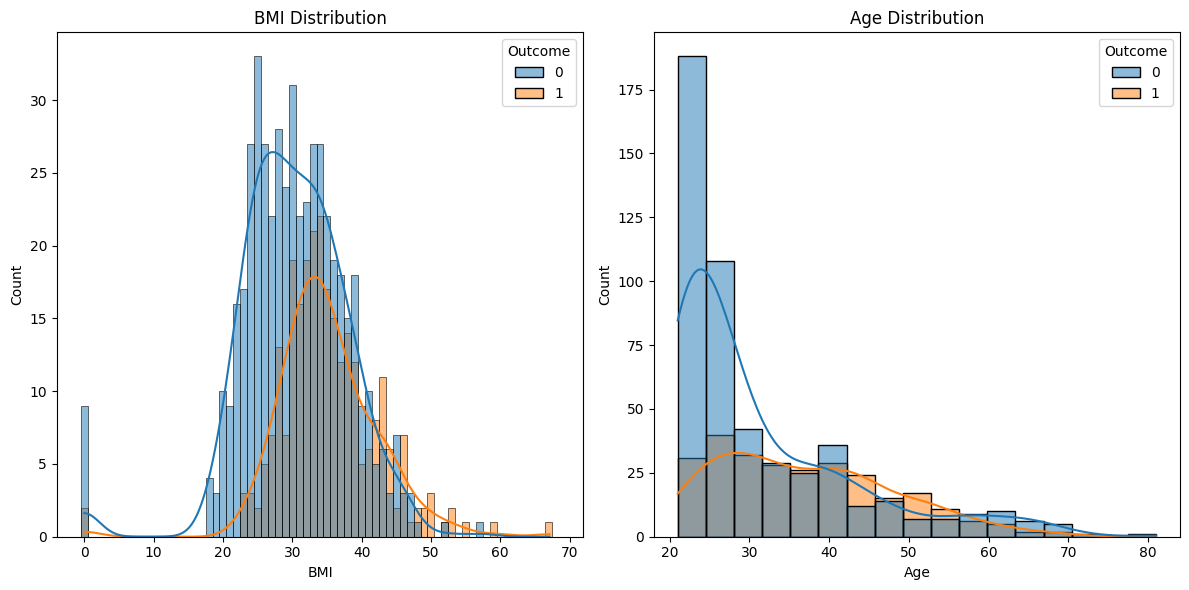

In [78]:
# Getting relationship between BMI, Age, and outcome
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='BMI', kde=True, hue='Outcome', discrete=True)
plt.title('BMI Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Age', kde=True, hue='Outcome')
plt.title('Age Distribution')

plt.tight_layout()
plt.show()

From the graphs, we get the following insights:-                                                                                
1) Majority of people don't have diabetes, but there is a slight change (increase) in number of diabetic people as compared to 
   non-diabetic people, having BMI greater than 42                                                                            
2) But, the majority of people who have diabetes have BMI ranging from 30 to 40                                                
3) Majority of people of ages 20-40 don't have diabetes. But the number of diabetic is maximum at age group of 28 to 33, which 
   then goes on decreasing with increasing age

Text(0.5, 1.0, 'DiabetesPedigreeFunction Distribution')

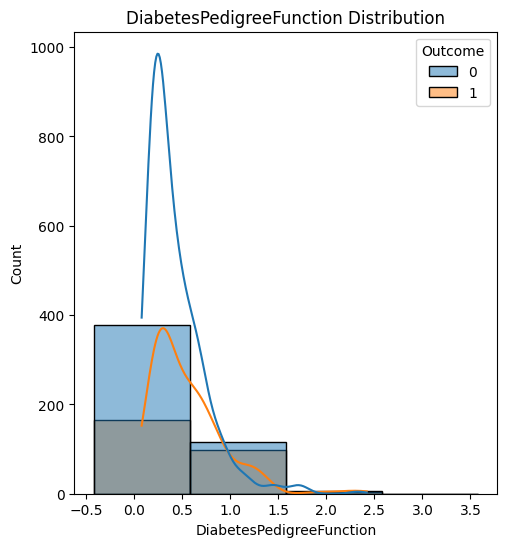

In [82]:
# Getting relationship of Diabetes Pedigree Function and outcome    
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='DiabetesPedigreeFunction', kde=True, hue='Outcome', discrete=True)
plt.title('DiabetesPedigreeFunction Distribution')

It seems that people with lower Diabetes Pedigree Function have higher chances of getting diabetes, but majority still remains with people not having diabetes as this range

### Now, Splitting dataset 

In [90]:
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

In [91]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [92]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Now, performing data standardization

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
st_df = scaler.transform(X)

In [94]:
print(st_df)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


### Now, performing train_test_split


In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.33,
                                                   stratify = Y,
                                                   random_state=33)

### Training the model
Since, our outcome is in form of a discrete data (0,1), therefore, we can say that this is a classification type machine learning problem

In [100]:
# Importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [103]:
# Making a dictionary of models we'll be using
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(kernel='linear'),
}

In [104]:
# Taking the parameters for hyperparameter tuning
param_grd = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [3500, 5000, 10000]
    },
    "K-Neighbors Classifier": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    "Decision Tree": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2']
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
}

In [108]:
model_list = []
accuracy_train_list = []
accuracy_test_list = []
pred_model_list = {}

for i in models:
    model = models[i]
    
    # Perform grid search cross validation on model using param_grid
    grid_search = GridSearchCV(estimator = model, param_grid = param_grd[i], cv=5)
    grid_search.fit(X_train, y_train) # Train model
    
    # Get the best hyperparameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    # Fit the best model on the training data
    best_model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Appending the accuracy scores and models in list
    model_list.append(i)
    pred_model_list[i] = best_model
    accuracy_train_list.append(model_train_accuracy)
    accuracy_test_list.append(model_test_accuracy)
    
    print(i)
    print('Model performance for Training and test dataset')
    print("- Training set accuracy score: {:.4f}".format(model_train_accuracy))
    print("- Test set accuracy score: {:.4f}".format(model_test_accuracy))
    print("------------------------------------------------------")
    print()

Logistic Regression
Model performance for Training and test dataset
- Training set accuracy score: 0.7918
- Test set accuracy score: 0.7717
------------------------------------------------------

K-Neighbors Classifier
Model performance for Training and test dataset
- Training set accuracy score: 0.7938
- Test set accuracy score: 0.7244
------------------------------------------------------

Decision Tree
Model performance for Training and test dataset
- Training set accuracy score: 0.8502
- Test set accuracy score: 0.7362
------------------------------------------------------

Support Vector Machine
Model performance for Training and test dataset
- Training set accuracy score: 0.7840
- Test set accuracy score: 0.7717
------------------------------------------------------



In [109]:
# Here is the overall model training outcome accuracy scores for each model
pd.DataFrame(list(zip(model_list, accuracy_train_list, accuracy_test_list)), columns=['Model Name', 'Accuracy_train_score', 'Accuracy_test_score'])

,Model Name,Accuracy_train_score,Accuracy_test_score
0,Logistic Regression,0.791829,0.771654
1,K-Neighbors Classifier,0.793774,0.724409
2,Decision Tree,0.850195,0.736220
3,Support Vector Machine,0.784047,0.771654


From the above given set of models, we can see that Decision tree gives the best Accuracy score for training dataset, while Logistic Regression gives best Accuracy score for test dataset.            
                                                                    
                                                                     
But, it is to be noted that Decision model is faced with overfitting condition, since there is a considerable difference between its accuracy scores of the test dataset and train dataset.

But since, the dataset we have taken is a considerably small datasets, therefore we'll consider the Decision tree as the best model for this case.
                                                                     

### Making a predictive system using the best model

In [115]:
input_data = (4, 110, 92, 0, 0, 37.6, 0.191, 30)

# Changing it to numpy array
input_data_np = np.asarray(input_data)

# reshaping the array as we are predicting for one instance
input_data_reshaped = input_data_np.reshape(1,-1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)

prediction = pred_model_list["Decision Tree"].predict(std_data)
if(prediction[0]==0):
    print("Person is not diabetic")
else:
    print("Person is diabetic")
    

Person is not diabetic
